In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv('clean_panel.csv')
df = df.drop(columns=["Unnamed: 0"])

colunas_numericas = df.columns.difference(['NOME', 'DATA'])  # Exclui 'Nome' e 'Data'

# Passo 2: Remova vírgulas e converta colunas numéricas para float
for col in colunas_numericas:
    df[col] = df[col].astype(str).str.replace(',', '').astype(float)
df

,DATA,NOME,AT,AT_CIR,CAIXA_EQ,ANC,RLP,IMOB,INVEST,PA_CIR,...,g_FCFF,g_FCFE,ROE,CI,ROIC,b_PL,b_NOPAT,LC,GIRO_AT,LEV
0,2021-06-30,3tentos,3731347.0,3079581.0,161896.0,651766.0,142487.0,508728.0,NaN,2616403.0,...,-1.030709,3.917398,0.151821,1814034.0,0.072090,1.191186,0.924604,1.177029,0.323042,1.116602
1,2021-09-30,3tentos,4353136.0,3555877.0,560333.0,797259.0,155027.0,641725.0,NaN,2044177.0,...,-110.554090,51.078403,0.114270,2967065.0,0.059997,12.618002,10.425570,1.739515,0.397310,0.436702
2,2021-12-31,3tentos,4395601.0,3354305.0,351590.0,1041296.0,247709.0,793132.0,NaN,1831275.0,...,-1.102718,-1.060091,0.080891,3035940.0,0.028437,0.590724,-0.248865,1.831677,0.371990,0.357609
3,2022-03-31,3tentos,5016524.0,3833602.0,720271.0,1182922.0,267428.0,915085.0,NaN,1984736.0,...,-5.266851,-0.553721,0.025392,3586375.0,0.027517,0.462629,6.381934,1.931542,0.253808,0.556955
4,2022-12-31,3tentos,6081989.0,4257219.0,724314.0,1824770.0,300853.0,1523576.0,NaN,2739186.0,...,-0.816910,-5.382520,0.086387,3914625.0,0.053226,1.262118,0.779274,1.554191,0.354553,0.388877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14257,2023-12-31,Zamp S.A.,4117466.0,902077.0,81279.0,3215389.0,282477.0,1378694.0,NaN,1306667.0,...,0.317866,-2.386875,0.044546,2510494.0,0.025644,0.263842,-0.704737,0.690365,0.260852,0.801342
14258,2024-03-31,Zamp S.A.,4590902.0,1430381.0,73419.0,3160521.0,279982.0,1378986.0,NaN,1247815.0,...,-6.328411,-2.750704,-0.065129,3101819.0,-0.004792,0.157851,-47.098701,1.146308,0.224057,1.367004
14259,2024-06-30,Zamp S.A.,4331322.0,1194092.0,31843.0,3137230.0,292544.0,1352974.0,NaN,1162528.0,...,-1.582437,-0.658599,-0.020988,2820296.0,0.009485,0.051122,-10.455922,1.027151,0.255868,1.254597
14260,2024-09-30,Zamp S.A.,4654390.0,1456330.0,21208.0,3198060.0,350361.0,1384537.0,NaN,1130529.0,...,-1.710967,15.539065,-0.025959,3164776.0,0.006034,-12.292067,15.080588,1.288185,0.241225,0.926930


In [14]:
df['FCFF_AT'] = df['FCFF']/df['AT']

df['FCFE_AT'] = df['FCFE']/df['AT']

In [15]:
from sklearn.preprocessing import MinMaxScaler 

features = ['FCFE', 'FCFF']

scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])
df

,DATA,NOME,AT,AT_CIR,CAIXA_EQ,ANC,RLP,IMOB,INVEST,PA_CIR,...,ROE,CI,ROIC,b_PL,b_NOPAT,LC,GIRO_AT,LEV,FCFF_AT,FCFE_AT
0,2021-06-30,3tentos,3731347.0,3079581.0,161896.0,651766.0,142487.0,508728.0,NaN,2616403.0,...,0.151821,1814034.0,0.072090,1.191186,0.924604,1.177029,0.323042,1.116602,0.002510,-0.005855
1,2021-09-30,3tentos,4353136.0,3555877.0,560333.0,797259.0,155027.0,641725.0,NaN,2044177.0,...,0.114270,2967065.0,0.059997,12.618002,10.425570,1.739515,0.397310,0.436702,-0.235657,-0.261377
2,2021-12-31,3tentos,4395601.0,3354305.0,351590.0,1041296.0,247709.0,793132.0,NaN,1831275.0,...,0.080891,3035940.0,0.028437,0.590724,-0.248865,1.831677,0.371990,0.357609,0.023972,0.015555
3,2022-03-31,3tentos,5016524.0,3833602.0,720271.0,1182922.0,267428.0,915085.0,NaN,1984736.0,...,0.025392,3586375.0,0.027517,0.462629,6.381934,1.931542,0.253808,0.556955,-0.089626,0.006082
4,2022-12-31,3tentos,6081989.0,4257219.0,724314.0,1824770.0,300853.0,1523576.0,NaN,2739186.0,...,0.086387,3914625.0,0.053226,1.262118,0.779274,1.554191,0.354553,0.388877,0.007236,-0.009654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14257,2023-12-31,Zamp S.A.,4117466.0,902077.0,81279.0,3215389.0,282477.0,1378694.0,NaN,1306667.0,...,0.044546,2510494.0,0.025644,0.263842,-0.704737,0.690365,0.260852,0.801342,0.026375,0.010604
14258,2024-03-31,Zamp S.A.,4590902.0,1430381.0,73419.0,3160521.0,279982.0,1378986.0,NaN,1247815.0,...,-0.065129,3101819.0,-0.004792,0.157851,-47.098701,1.146308,0.224057,1.367004,-0.126043,-0.016651
14259,2024-06-30,Zamp S.A.,4331322.0,1194092.0,31843.0,3137230.0,292544.0,1352974.0,NaN,1162528.0,...,-0.020988,2820296.0,0.009485,0.051122,-10.455922,1.027151,0.255868,1.254597,0.077812,-0.006025
14260,2024-09-30,Zamp S.A.,4654390.0,1456330.0,21208.0,3198060.0,350361.0,1384537.0,NaN,1130529.0,...,-0.025959,3164776.0,0.006034,-12.292067,15.080588,1.288185,0.241225,0.926930,-0.051482,-0.092734


In [16]:
import time
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

target_var = 'FCFE'
k = 4

def expanding_window_forecast_arima(df, target_col=target_var, empresa_col='NOME', date_col='DATA',
                                     min_train_size=k, horizon=1, arima_order=(1,1,1)):
    results = []

    for empresa_id, grupo in df.groupby(empresa_col):
        grupo = grupo.sort_values(date_col).reset_index(drop=True)

        for end_train in range(min_train_size, len(grupo) - horizon + 1):
            train = grupo.iloc[:end_train]
            test = grupo.iloc[end_train:end_train + horizon]

            y_train = train[target_col]
            y_test = test[target_col]

            try:
                model = ARIMA(y_train, order=arima_order)
                model_fit = model.fit()

                forecast = model_fit.forecast(steps=horizon)
                y_pred = forecast.values[0]
                erro = abs(y_pred - y_test.values[0])

                train_pred = model_fit.fittedvalues
                train_rmse = mean_squared_error(y_train[1:], train_pred[1:], squared=False)
                test_rmse = mean_squared_error([y_test.values[0]], [y_pred], squared=False)

                overfitting = train_rmse < test_rmse * 0.5
                underfitting = train_rmse > test_rmse * 0.5  

                results.append({
                    'Empresa': empresa_id,
                    'Data': test[date_col].values[0],
                    'Real': y_test.values[0],
                    'Previsto': y_pred,
                    'Erro Absoluto': erro,
                    'Train RMSE': train_rmse,
                    'Test RMSE': test_rmse,
                    'Overfitting?': overfitting,
                    'Underfitting?': underfitting
                })

            except Exception as e:
                print(f"Erro ao ajustar ARIMA para {empresa_id} na data {test[date_col].values[0]}: {e}")
                continue

    return pd.DataFrame(results)

# Exemplo de uso:
media = df[target_var].mean()
dp = df[target_var].std()

start = time.time()
resultado = expanding_window_forecast_arima(df)
end = time.time()

print(f'Tempo de computação: {end - start:.2f} segundos')

rmse = mean_squared_error(resultado['Real'], resultado['Previsto'], squared=False)
mae = mean_absolute_error(resultado['Real'], resultado['Previsto'])
r2 = r2_score(resultado['Real'], resultado['Previsto'])

n = len(resultado)  
p = len(['FCFF'])  
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

train_rmse_media = resultado['Train RMSE'].mean()
test_rmse_media = resultado['Test RMSE'].mean()
print(f'R2 da regressão: {r2}')
print(f'R2 ajustado da regressão: {r2_adj}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'RMSE como % da média: {(rmse/media)*100:.2f}%')
print(f'RMSE como % do DP: {(rmse/dp)*100:.2f}%')
print(f'RMSE Treino Média: {train_rmse_media}')
print(f'RMSE Teste Média: {test_rmse_media}')
print(f'Fit do modelo: {train_rmse_media/test_rmse_media}')
resultado

Erro ao ajustar ARIMA para Dtcom Direct na data 2020-12-31: LU decomposition error.
Erro ao ajustar ARIMA para Excelsior na data 2015-06-30: LU decomposition error.
Tempo de computação: 750.33 segundos
R2 da regressão: -0.2953909516115176
R2 ajustado da regressão: -0.2954944669504669
RMSE: 0.01831917940699282
MAE: 0.0037096667162473977
RMSE como % da média: 2.86%
RMSE como % do DP: 119.72%
RMSE Treino Média: 0.004243519255484315
RMSE Teste Média: 0.0037096667162473977
Fit do modelo: 1.1439084909969888


,Empresa,Data,Real,Previsto,Erro Absoluto,Train RMSE,Test RMSE,Overfitting?,Underfitting?
0,3tentos,2022-12-31,0.640359,0.639417,0.000942,0.004336,0.000942,False,True
1,3tentos,2023-03-31,0.640895,0.640195,0.000700,0.003776,0.000700,False,True
2,3tentos,2023-06-30,0.640633,0.640895,0.000261,0.002738,0.000261,False,True
3,3tentos,2023-09-30,0.640572,0.640734,0.000161,0.003141,0.000161,False,True
4,3tentos,2023-12-31,0.640514,0.640581,0.000067,0.002958,0.000067,False,True
...,...,...,...,...,...,...,...,...,...
12511,Zamp S.A.,2023-12-31,0.640914,0.640348,0.000566,0.001460,0.000566,False,True
12512,Zamp S.A.,2024-03-31,0.640262,0.640515,0.000253,0.001437,0.000253,False,True
12513,Zamp S.A.,2024-06-30,0.640536,0.640496,0.000039,0.001410,0.000039,False,True
12514,Zamp S.A.,2024-09-30,0.638335,0.640478,0.002143,0.001384,0.002143,False,True


In [17]:
resultado.to_csv('ARIMA_resultados_FCLA.csv')

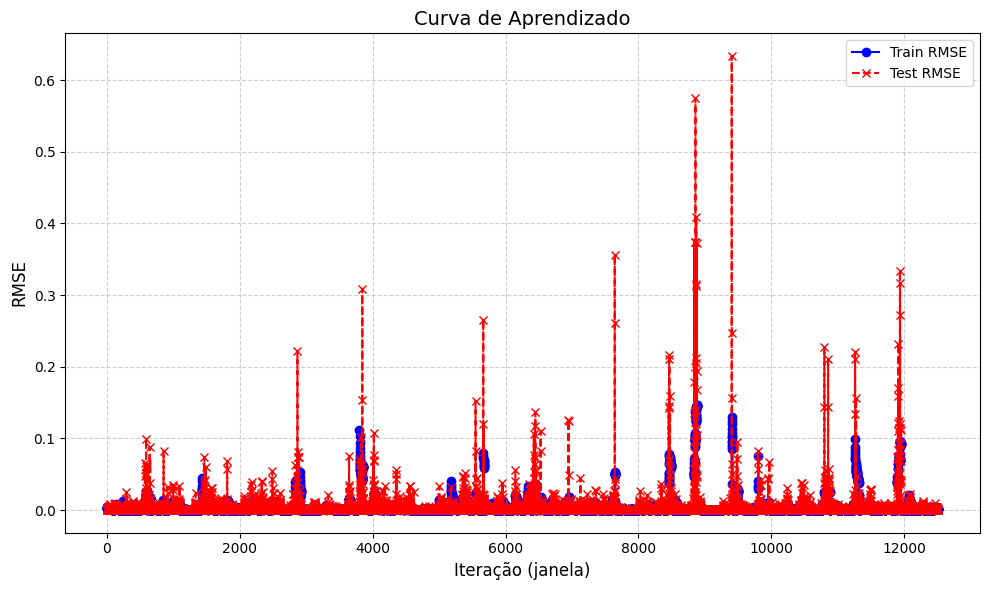

In [18]:
x_vals = range(len(resultado))  # ou resultado['Data'] se quiser por data

plt.figure(figsize=(10, 6))
plt.plot(x_vals, resultado['Train RMSE'], label='Train RMSE', marker='o', linestyle='-', color='blue')
plt.plot(x_vals, resultado['Test RMSE'], label='Test RMSE', marker='x', linestyle='--', color='red')
plt.title('Curva de Aprendizado', fontsize=14)
plt.xlabel('Iteração (janela)', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

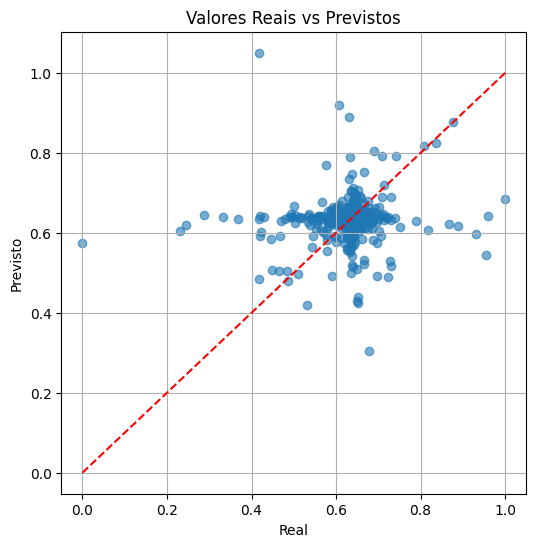

In [19]:
plt.figure(figsize=(6, 6))
plt.scatter(resultado['Real'], resultado['Previsto'], alpha=0.6)
plt.plot([resultado['Real'].min(), resultado['Real'].max()],
         [resultado['Real'].min(), resultado['Real'].max()],
         color='red', linestyle='--')
plt.xlabel('Real')
plt.ylabel('Previsto')
plt.title('Valores Reais vs Previstos')
plt.grid(True)
plt.show()

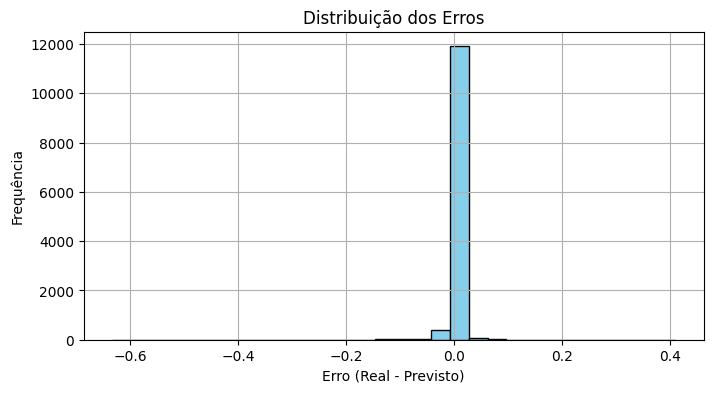

In [20]:
resultado['Erro'] = resultado['Real'] - resultado['Previsto']

plt.figure(figsize=(8, 4))
plt.hist(resultado['Erro'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuição dos Erros')
plt.xlabel('Erro (Real - Previsto)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

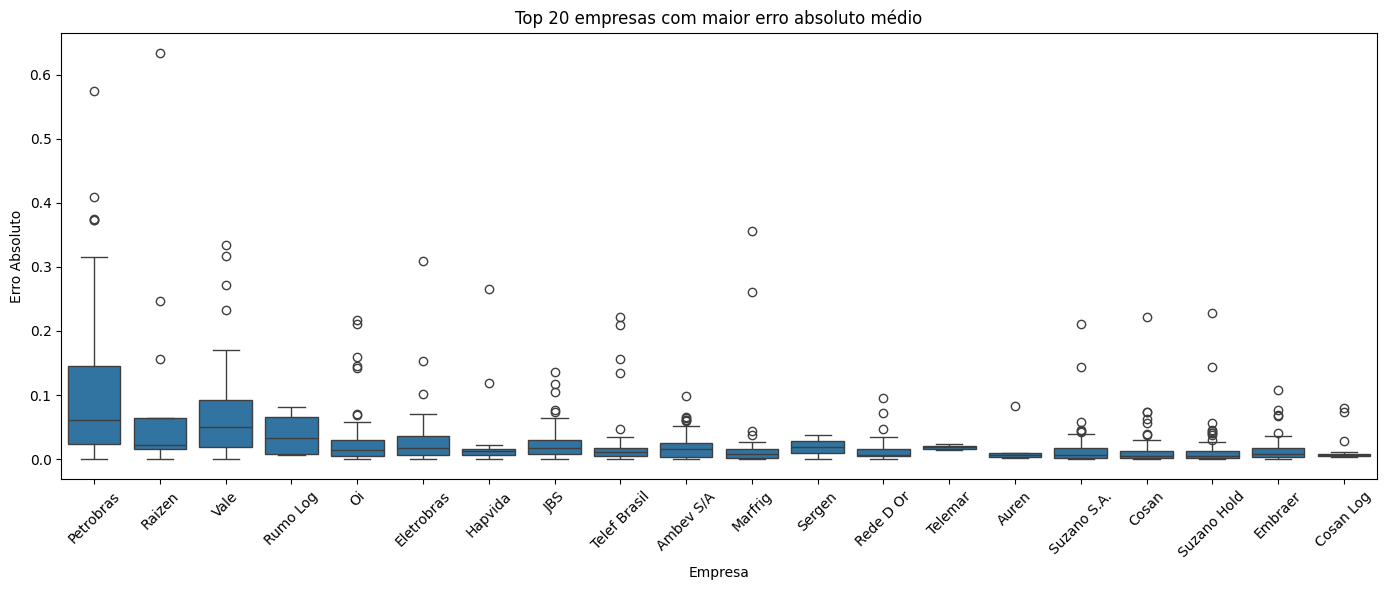

In [21]:
top_n = 20
top_empresas = resultado.groupby('Empresa')['Erro Absoluto'].mean().nlargest(top_n).index

plt.figure(figsize=(14, 6))
sns.boxplot(data=resultado[resultado['Empresa'].isin(top_empresas)],
            x='Empresa', y='Erro Absoluto', order=top_empresas)
plt.xticks(rotation=45)
plt.title(f'Top {top_n} empresas com maior erro absoluto médio')
plt.tight_layout()
plt.show()

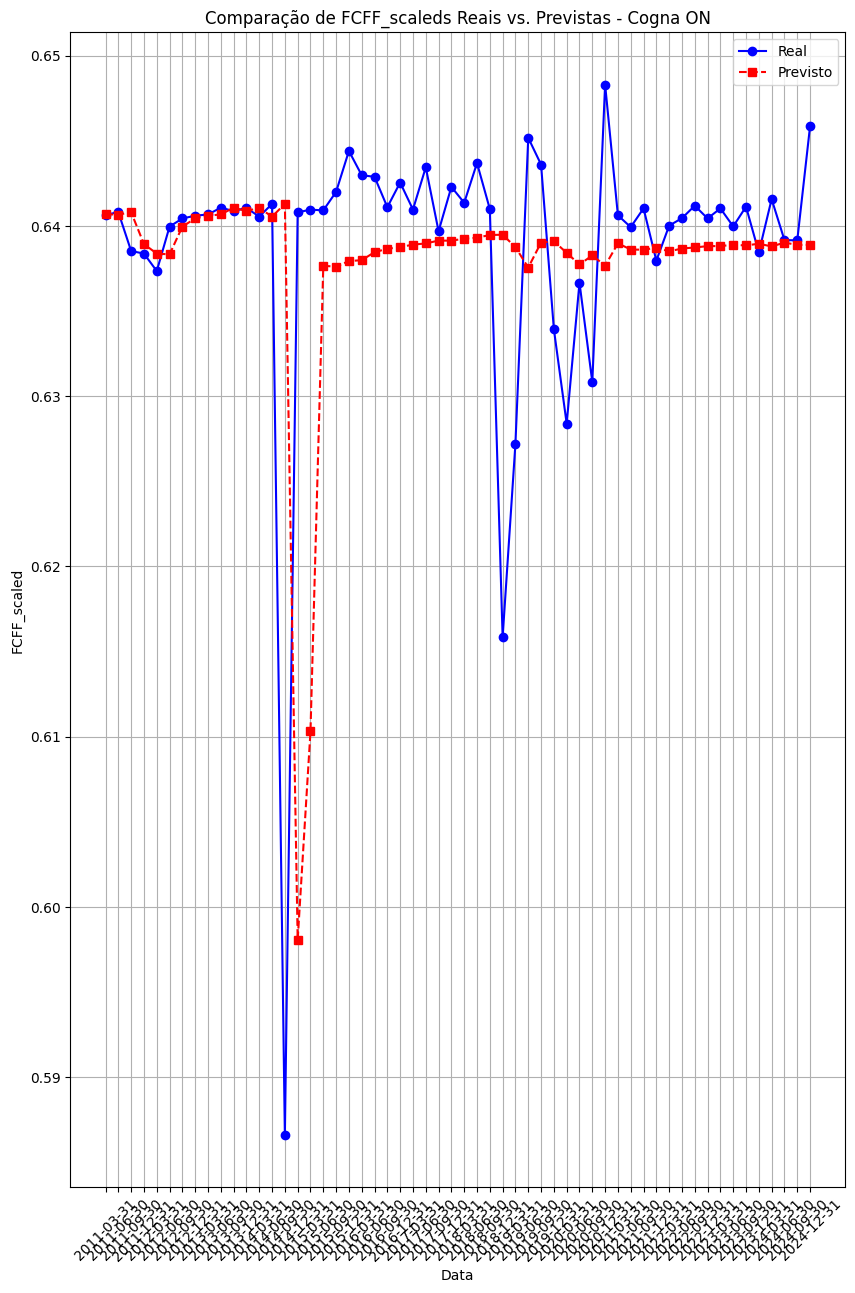

In [22]:
results_df = resultado
empresa_selecionada = 'Cogna ON'
df_selecionado = results_df[results_df["Empresa"] == empresa_selecionada]

plt.figure(figsize=(10,15))
plt.plot(df_selecionado["Data"], df_selecionado["Real"], label="Real", marker='o', linestyle='solid', color="blue")
plt.plot(df_selecionado["Data"], df_selecionado["Previsto"], label="Previsto", marker='s', linestyle='dashed', color="red")

plt.xlabel("Data")
plt.ylabel("FCFF_scaled")
plt.title(f"Comparação de FCFF_scaleds Reais vs. Previstas - {empresa_selecionada}")
plt.legend()
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo X para melhor visualização
plt.grid(True)

plt.show()